In [359]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD





df = pd.read_csv('SMSSpamCollection.data', delimiter='	',header=None, na_values='?')


target = pd.DataFrame(df[0])
target = target.replace('spam', 1)
target = target.replace('ham', 0)
target = target.rename(columns={0: "spam"})



In [360]:
from sklearn.feature_extraction.text import CountVectorizer

mf = 500
vectorizer = CountVectorizer(max_features=mf)
X = vectorizer.fit_transform(df[1])


analyze = vectorizer.build_analyzer()
X = X.toarray()
X = pd.DataFrame(X)

transformer = TfidfTransformer()
X = pd.DataFrame(transformer.fit_transform(X).toarray())
nc = 100
"""
svd = TruncatedSVD(n_components=nc, n_iter=10, random_state=42)
svd.fit(X) 
SVD = pd.DataFrame(svd.transform(X))
"""

df = pd.concat([target,X], axis=1)

ham = df[df['spam'] == 0].sample(frac=0.5)
spam = df[df['spam'] == 1].sample(n=20)
test = pd.DataFrame(pd.concat([ham,spam], axis=0)['spam'],columns=['spam'])
ham.drop('spam', inplace=True, axis=1)
spam.drop('spam', inplace=True, axis=1)

train = pd.concat([ham,spam], axis=0)

contamination = 20/len(train)
ne = 1000



In [361]:
clf = IsolationForest(n_estimators=ne, contamination=contamination, n_jobs=-1)
clf.fit(train)
prediction  = clf.predict(train)
pred = (list(map(lambda x: int(x == -1), prediction)))



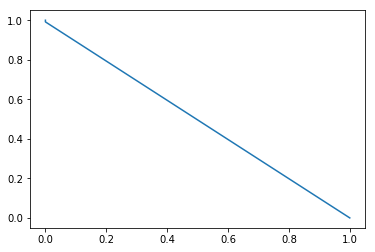

In [362]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

tn, fp, fn, tp = confusion_matrix(np.array(test['spam']), pred).ravel()

CM = pd.DataFrame([[tn, tp],[fn,fp]], index=['True', 'False'], columns=['neg', 'pos'])

accuracy = tp/(tp + fp)
recall = tp/ (tp +fn)
sensibility = tn/(tn + fp)
specificity = (recall)



import matplotlib.pyplot as plt

plt.plot([0,specificity,1],[1,sensibility,0])
plt.show()

In [363]:
CM

,neg,pos
True,2392,0
False,20,20
